In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_excel('/content/Indian Food Cuisine Dataset.xlsx')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6055 entries, 0 to 6054
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name_of_Dish         6055 non-null   object
 1   Diet_Type            6055 non-null   object
 2   Course_name          6055 non-null   object
 3   Discrption_of_Dish   6055 non-null   object
 4   Cuisine_name         6055 non-null   object
 5   Ratings_of_Dish      6055 non-null   object
 6   Similar_Dishes       6055 non-null   object
 7   Ingredients_of_Dish  6055 non-null   object
 8   Prepration_time      6055 non-null   object
 9   Cooking_time         6055 non-null   object
 10  Total_time           6055 non-null   object
 11  Makes                6055 non-null   object
 12  Recipe_Instructions  6055 non-null   object
dtypes: object(13)
memory usage: 615.1+ KB


In [ ]:
df.isnull().sum()

,0
name_of_Dish,0
Diet_Type,0
Course_name,0
Discrption_of_Dish,0
Cuisine_name,0
Ratings_of_Dish,0
Similar_Dishes,0
Ingredients_of_Dish,0
Prepration_time,0
Cooking_time,0


In [ ]:
df.dtypes

,0
name_of_Dish,object
Diet_Type,object
Course_name,object
Discrption_of_Dish,object
Cuisine_name,object
Ratings_of_Dish,object
Similar_Dishes,object
Ingredients_of_Dish,object
Prepration_time,object
Cooking_time,object


In [ ]:
# Convert 'Prep time' column to numeric, coercing errors to NaN
df['Prepration_time'] = pd.to_numeric(df['Prepration_time'], errors='coerce')

# Convert 'Cook time' column to numeric, coercing errors to NaN
df['Cooking_time'] = pd.to_numeric(df['Cooking_time'], errors='coerce')

df['Ratings_of_Dish'] = pd.to_numeric(df['Ratings_of_Dish'], errors='coerce')

# Display data types after conversion
df.dtypes

,0
name_of_Dish,object
Diet_Type,object
Course_name,object
Discrption_of_Dish,object
Cuisine_name,object
Ratings_of_Dish,float64
Similar_Dishes,object
Ingredients_of_Dish,object
Prepration_time,float64
Cooking_time,float64


In [ ]:
df.describe()

,Ratings_of_Dish,Prepration_time,Cooking_time
count,6047.000000,277.000000,101.000000
mean,4.882256,306.458484,306.683168
std,0.518734,322.572072,711.536463
min,3.200000,100.000000,100.000000
25%,4.900000,130.000000,120.000000
50%,4.900000,240.000000,160.000000
75%,4.900000,400.000000,360.000000
max,45.000000,2880.000000,7200.000000


In [ ]:
dt = df['Diet_Type'].value_counts()
dt

,count
Diet_Type,
Diet: Vegetarian,4210
Diet: High Protein Vegetarian,540
Diet: Non Vegeterian,393
Diet: Eggetarian,320
Diet: Diabetic Friendly,218
Diet: High Protein Non Vegetarian,205
Diet: Gluten Free,55
Diet: No Onion No Garlic (Sattvic),54
Diet: Vegan,45


In [ ]:
dr = df['Ratings_of_Dish'].value_counts()
dr

,count
Ratings_of_Dish,
4.9,4713
4.8,1237
4.7,73
4.6,17
4.4,3
4.5,2
45.0,1
3.2,1


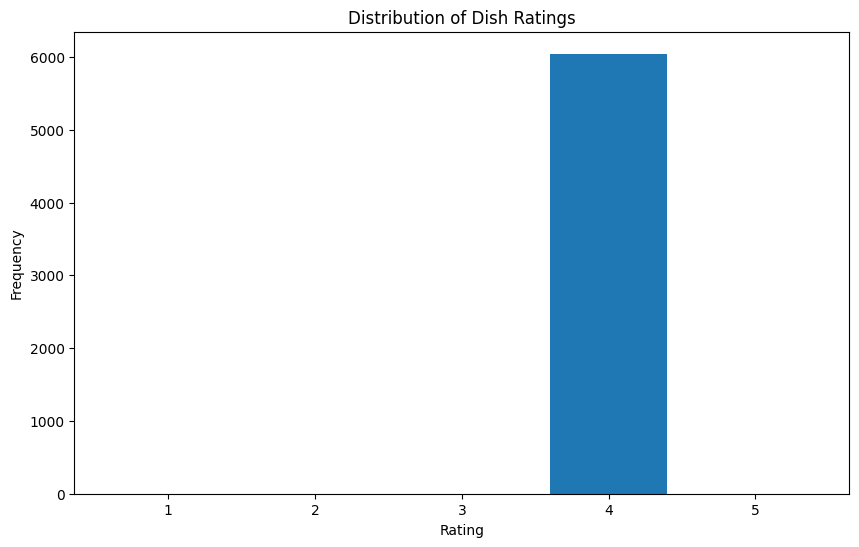

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Ratings_of_Dish'], bins=range(1, 7), align='left', rwidth=0.8)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Dish Ratings')
plt.xticks(range(1, 6))
plt.show()

In [ ]:
df['Diet_Type'] = df['Diet_Type'].str.upper()
df['Diet_Type']


,Diet_Type
0,DIET: VEGETARIAN
1,DIET: HIGH PROTEIN VEGETARIAN
2,DIET: VEGETARIAN
3,DIET: VEGETARIAN
4,DIET: NON VEGETERIAN
...,...
6050,DIET: VEGETARIAN
6051,DIET: VEGETARIAN
6052,DIET: VEGETARIAN
6053,DIET: VEGETARIAN


In [ ]:
df['Discrption_of_Dish'] = df['Discrption_of_Dish'].str.strip()
df['Discrption_of_Dish']

,Discrption_of_Dish
0,Lasaniya Batata Recipe (Garlic Potato Curry) i...
1,The Palak Mushroom Makhani Recipe is a creamy ...
2,TheÂ Grilled Peri Peri Paneer that is made fro...
3,Mangalorean Style Sonay Sukhe is a very import...
4,Andhra Pepper Chicken Recipe is a delicious ch...
...,...
6050,Spinach Oats Vada Recipe is a healthy twist to...
6051,Vettu cake is a famous tea shop snack in Tamil...
6052,TheÂ Gooseberry (Amla/Nellikai) Chutney recipe...
6053,Kanchakalar Khosha Bata is a traditional Benga...


In [ ]:
df['Total_time'] = df['Prepration_time'] + df['Cooking_time']
df['Total_time']

,Total_time
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6050,NaN
6051,NaN
6052,NaN
6053,NaN


In [ ]:
df['Cooking_time'].mean()

306.6831683168317

In [ ]:
# Convert 'Ratings_of_Dish' column to numeric, handling non-numeric values
df['Ratings_of_Dish'] = pd.to_numeric(df['Ratings_of_Dish'], errors='coerce')

# Replace NaN values with 0 (or any suitable value)
df['Ratings_of_Dish'] = df['Ratings_of_Dish'].fillna(0)

# If newline characters are present, remove them before conversion
df['Ratings_of_Dish'] = df['Ratings_of_Dish'].astype(str).str.replace('\n', '').astype(float)

# Now calculate the correlation
df[['Prepration_time', 'Ratings_of_Dish']].corr()

,Prepration_time,Ratings_of_Dish
Prepration_time,1.000000,-0.023448
Ratings_of_Dish,-0.023448,1.000000


In [ ]:
df5 = df.sort_values(by='Ratings_of_Dish', ascending=False)
df5.head(5)

,name_of_Dish,Diet_Type,Course_name,Discrption_of_Dish,Cuisine_name,Ratings_of_Dish,Similar_Dishes,Ingredients_of_Dish,Prepration_time,Cooking_time,Total_time,Makes,Recipe_Instructions
306,Eggless Spicy Spinach Bread Recipe,DIET: HIGH PROTEIN VEGETARIAN,Course: World Breakfast,Eggless Spicy Spinach Bread is one of the quic...,['Cuisine: Continental'],45.0,"['Sesame Bread Patties', 'Paneer Bread Balls',...","['All Purpose Flour (Maida)', 'Onion', 'Baking...",NaN,NaN,NaN,4 Servings,['To begin making the Eggless Spicy Spinach Br...
0,Gujarati Lasaniya Batata Recipe - Garlic Potat...,DIET: VEGETARIAN,Course: Side Dish,Lasaniya Batata Recipe (Garlic Potato Curry) i...,['Cuisine: Gujarati Recipes\ufeff'],4.9,"['Chatpata Baby Potato Recipe', 'Bhaji Miligai...","['Baby Potatoes', 'Garlic', 'Oil', 'Cumin seed...",NaN,NaN,NaN,2 Servings,['To begin making the Gujarati Lasaniya Batata...
3724,Roasted Vegetable Panini Sandwich With Feta Ch...,DIET: VEGETARIAN,Course: Main Course,Roasted Vegetable Sandwich With Feta Cheese Re...,['Cuisine: Continental'],4.9,['Scrambled Egg Sandwich Recipe With Cucumber'...,"['Panini Bread', 'Green zucchini', 'Red Bell p...",NaN,NaN,NaN,3 Servings,['To begin making the Roasted Vegetable Sandwi...
3731,Kabuli Chana Chaat - High Protein Snack of Chi...,DIET: HIGH PROTEIN VEGETARIAN,Course: Snack,Chana Chaat is a delicious high protein chaat ...,['Cuisine: North Indian Recipes'],4.9,"['Homemade Canape Papdi Chaat Recipe,', 'Sev P...","['Kabuli Chana (White Chickpeas)', 'Tomatoes',...",NaN,NaN,NaN,3 Servings,"['To begin making Kabuli Chana Chaat Recipe, s..."
3730,Cashewnut Stuffed Paneer Balls Recipe,DIET: VEGETARIAN,Course: Dinner,Cashew Nut Stuffed Paneer Balls are a tasty tr...,['Cuisine: Indian'],4.9,"['Crispy Eggless Bread Pinwheels Recipe', 'Che...","['Paneer (Homemade Cottage Cheese)', 'Cashew n...",NaN,NaN,NaN,10 Servings,['To begin the preparation of Cashew Nut Stuff...


In [ ]:
cd = pd.pivot_table(df, index='Cuisine_name', values='name_of_Dish', aggfunc='count')
cd


,name_of_Dish
Cuisine_name,
['Cuisine: Afghan'],4
['Cuisine: African'],20
['Cuisine: American'],5
['Cuisine: Andhra'],111
['Cuisine: Arab'],4
...,...
['Cuisine: Udupi'],15
['Cuisine: Uttar Pradesh'],12
['Cuisine: Uttarakhand-North Kumaon'],3


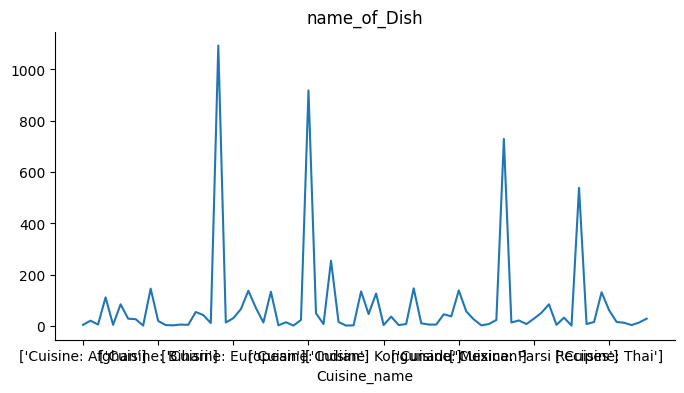

In [ ]:
from matplotlib import pyplot as plt
cd['name_of_Dish'].plot(kind='line', figsize=(8, 4), title='name_of_Dish')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df['Ingredients_of_Dish'].str.split(',')

,Ingredients_of_Dish
0,"[['Baby Potatoes', 'Garlic', 'Oil', 'Cumin ..."
1,"[['Button mushrooms', 'Spinach Leaves (Palak)..."
2,"[['Paneer (Homemade Cottage Cheese)', ""Nando'..."
3,"[['Kabuli Chana (White Chickpeas)', 'Mustard ..."
4,"[['Chicken', 'Garlic', 'Ginger', 'Lemon', ..."
...,...
6050,"[['Spinach Leaves (Palak)', 'Chana dal (Benga..."
6051,"[['Whole Wheat Flour', 'Sugar', 'Cooking sod..."
6052,"[['title=""Amla is an Indian Gooseberry. It is ..."
6053,"[['Raw Banana', 'Garlic', 'Green Chilli', '..."


In [ ]:
df['Ratings_of_Dish'].describe()

,Ratings_of_Dish
count,6055.000000
mean,4.875805
std,0.547892
min,0.000000
25%,4.900000
50%,4.900000
75%,4.900000
max,45.000000


In [ ]:
df['Ratings_of_Dish'].quantile([0.25, 0.75])

,Ratings_of_Dish
0.25,4.9
0.75,4.9


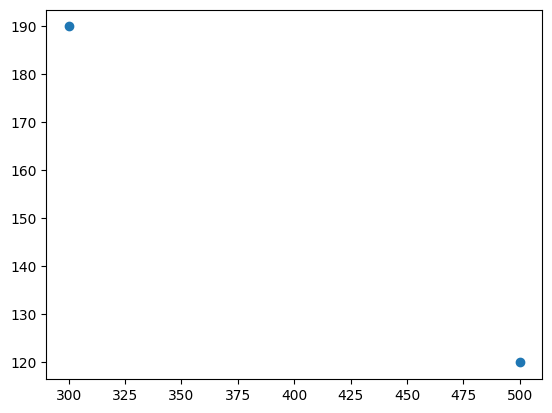

In [ ]:
plt.scatter(df['Prepration_time'], df['Cooking_time'])

In [ ]:
df['Instruction_Length'] = df['Recipe_Instructions'].str.len()
df['Instruction_Length']

,Instruction_Length
0,959
1,1498
2,1081
3,1286
4,1636
...,...
6050,696
6051,1072
6052,858
6053,753


In [ ]:
# Calculate the correlation between instruction length and dish rating
correlation = df['Instruction_Length'].corr(df['Ratings_of_Dish'])
print(f"Correlation between Instruction Length and Dish Rating: {correlation}")


Correlation between Instruction Length and Dish Rating: 0.006522391400775789


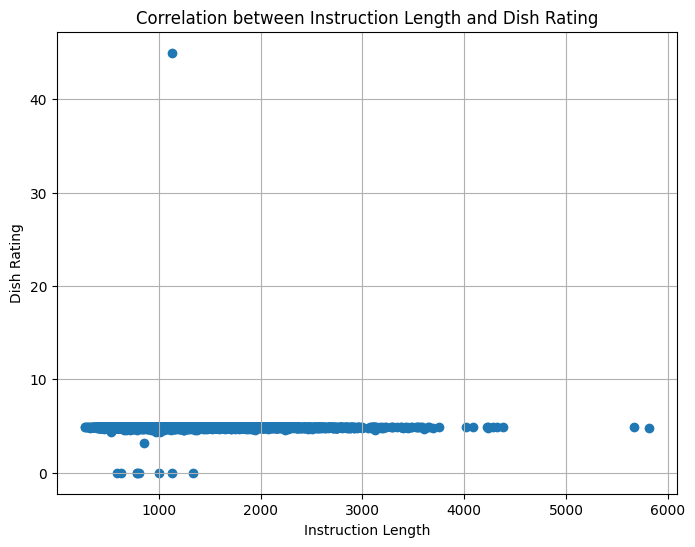

In [ ]:
# Visualize the correlation (optional)
plt.figure(figsize=(8, 6))
plt.scatter(df['Instruction_Length'], df['Ratings_of_Dish'])
plt.xlabel('Instruction Length')
plt.ylabel('Dish Rating')
plt.title('Correlation between Instruction Length and Dish Rating')
plt.grid(True)
plt.show()